In [1]:
from keras.datasets import mnist
from keras.layers import *
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam

import numpy as np
import matplotlib.pyplot as plt
import math

import warnings
warnings.filterwarnings(action='ignore', category=UserWarning)

Using TensorFlow backend.


### Load And Visualise The Data

In [2]:
(X_Train,_), (_,_) = mnist.load_data()

print(X_Train.shape)

(60000, 28, 28)


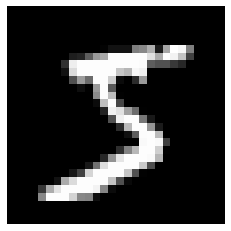

In [3]:
plt.imshow(X_Train[0], cmap='gray')
plt.axis("off")
plt.show()

### Normalize This Data [-1, 1]

In [4]:
X_Train = (X_Train.astype('float32') - 127.5)/127.5
print(np.min(X_Train))
print(np.max(X_Train))
print(X_Train.shape)

-1.0
1.0
(60000, 28, 28)


### Reshaping The Data

In [5]:
X_Train = X_Train.reshape(-1, 784)
print(X_Train.shape)

(60000, 784)


### Defining Some Parameters

In [6]:
TOTAL_EPOCHS = 50
BATCH_SIZE = 256
NO_OF_BATCHES = int(X_Train.shape[0]/BATCH_SIZE)
HALF_BATCH = int(BATCH_SIZE/2)
NOISE_DIM = 100 # Upsample This Into 784 Dim Vector Later
adam = Adam(lr=2e-4, beta_1=0.5)

### Building The Generator

In [7]:
# Generator
# Input Noise (100 dimension) And Outputs a Vector (784 Dimension), Upsampling

generator = Sequential()
generator.add(Dense(256,input_shape=(NOISE_DIM,)))
generator.add(LeakyReLU(0.2)) # Value Of Alpha : 0.2
generator.add(Dense(512))
generator.add(LeakyReLU(0.2))
generator.add(Dense(1024))
generator.add(LeakyReLU(0.2))
generator.add(Dense(784, activation='tanh'))

generator.compile(loss='binary_crossentropy', optimizer=adam)
generator.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               25856     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              525312    
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 784)              

### Building The Discriminator

In [8]:
# Downsampling
discriminator = Sequential()
discriminator.add(Dense(512, input_shape=(784,)))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dense(256))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dense(1, activation='sigmoid'))

discriminator.compile(loss='binary_crossentropy', optimizer=adam)
discriminator.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 512)               401920    
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 257       
Total params: 533,505
Trainable params: 533,505
Non-trainable params: 0
_________________________________________________________________


### Building The Complete GAN Model By Combining Generator And Discriminator

In [9]:
# GAN (Step-2)

discriminator.trainable = False
gan_input = Input(shape=(NOISE_DIM,)) # Acts As A Placeholder
generated_img = generator(gan_input)
gan_output = discriminator(generated_img)

# Functional API
model = Model(gan_input, gan_output)
model.compile(loss='binary_crossentropy', optimizer=adam)
# Discriminator Weights Are Only Frozen For This
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100)               0         
_________________________________________________________________
sequential_1 (Sequential)    (None, 784)               1486352   
_________________________________________________________________
sequential_2 (Sequential)    (None, 1)                 533505    
Total params: 2,019,857
Trainable params: 1,486,352
Non-trainable params: 533,505
_________________________________________________________________


### Function To Visualise & Save Output Images

In [10]:
def save_imgs(epoch, samples=100):
    noise = np.random.normal(0, 1, size=(samples, NOISE_DIM))
    generated_imgs = generator.predict(noise)
    generated_imgs = generated_imgs.reshape(samples, 28, 28)
    
    plt.figure(figsize=(15,15))
    for i in range(samples):
        plt.subplot(10,10,i+1)
        plt.imshow(generated_imgs[i], interpolation='nearest', cmap='gray')
        plt.axis("off")
    plt.tight_layout()
    plt.savefig("GAN_Images/GAN_Output_Epoch_{}.png".format(epoch+1))
    plt.show()

### Training Loop (Two Step Process)

Epoch 1 ! Discriminator Loss = 0.6586 & Generator Loss = 0.9449
Epoch 2 ! Discriminator Loss = 0.6467 & Generator Loss = 0.9994
Epoch 3 ! Discriminator Loss = 0.6314 & Generator Loss = 1.1126
Epoch 4 ! Discriminator Loss = 0.6194 & Generator Loss = 1.1229
Epoch 5 ! Discriminator Loss = 0.6095 & Generator Loss = 1.1609


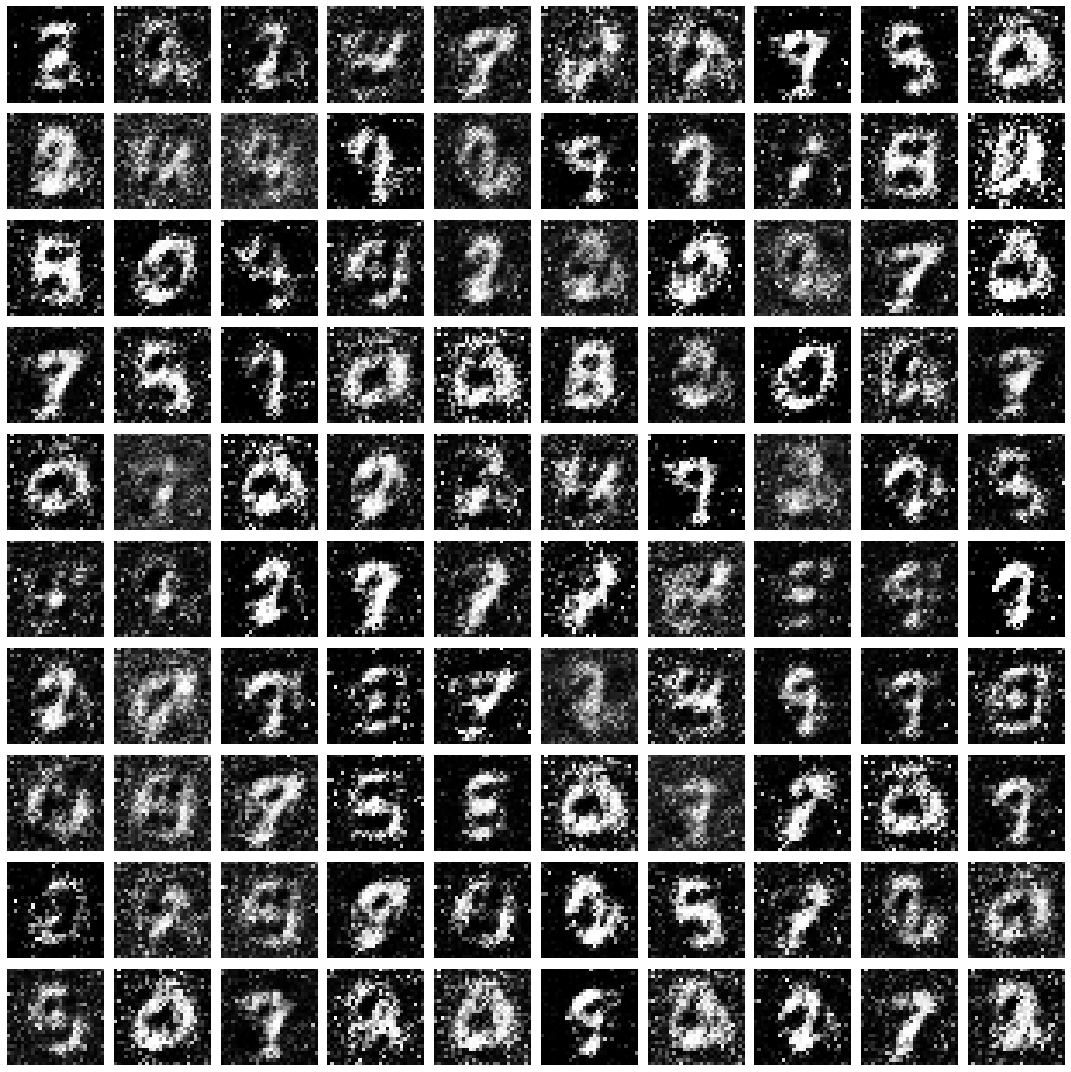

Epoch 6 ! Discriminator Loss = 0.5882 & Generator Loss = 1.2038
Epoch 7 ! Discriminator Loss = 0.5845 & Generator Loss = 1.2421
Epoch 8 ! Discriminator Loss = 0.5880 & Generator Loss = 1.2185
Epoch 9 ! Discriminator Loss = 0.5590 & Generator Loss = 1.3212
Epoch 10 ! Discriminator Loss = 0.6114 & Generator Loss = 1.1566


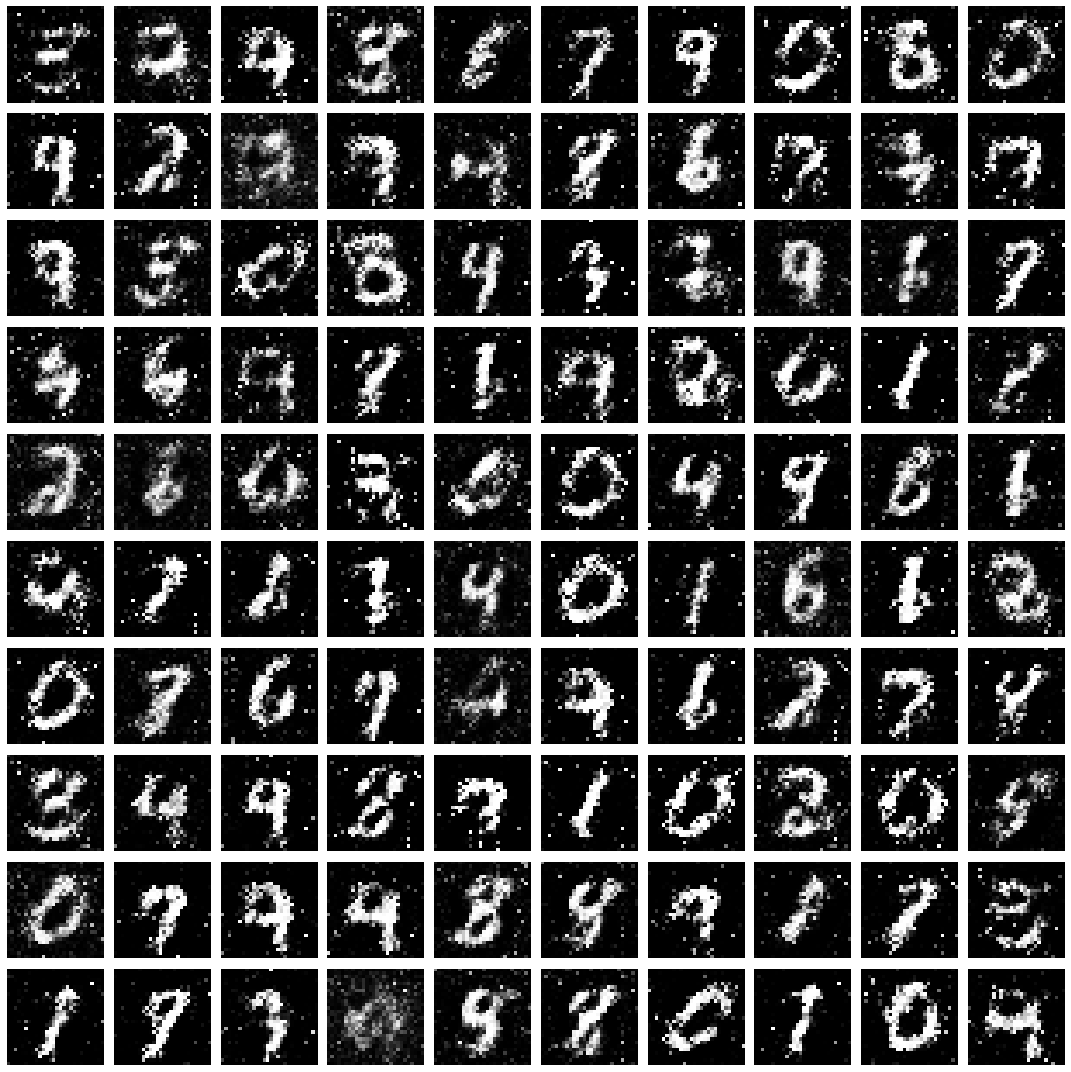

Epoch 11 ! Discriminator Loss = 0.6345 & Generator Loss = 1.0577
Epoch 12 ! Discriminator Loss = 0.6454 & Generator Loss = 1.0259
Epoch 13 ! Discriminator Loss = 0.6493 & Generator Loss = 1.0116
Epoch 14 ! Discriminator Loss = 0.6491 & Generator Loss = 0.9991
Epoch 15 ! Discriminator Loss = 0.6450 & Generator Loss = 1.0212


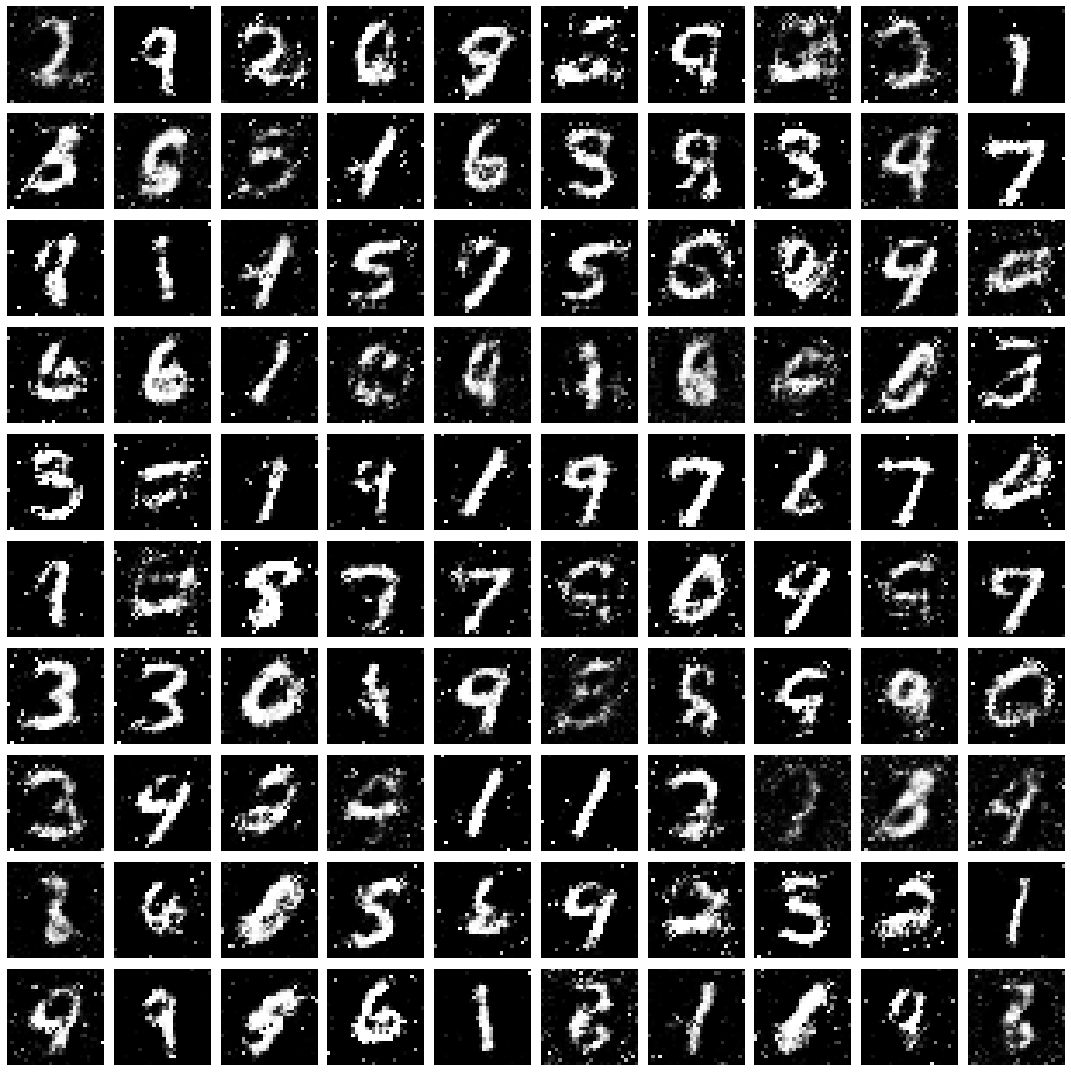

Epoch 16 ! Discriminator Loss = 0.6437 & Generator Loss = 1.0249
Epoch 17 ! Discriminator Loss = 0.6441 & Generator Loss = 1.0347
Epoch 18 ! Discriminator Loss = 0.6461 & Generator Loss = 1.0207
Epoch 19 ! Discriminator Loss = 0.6460 & Generator Loss = 1.0236
Epoch 20 ! Discriminator Loss = 0.6448 & Generator Loss = 1.0312


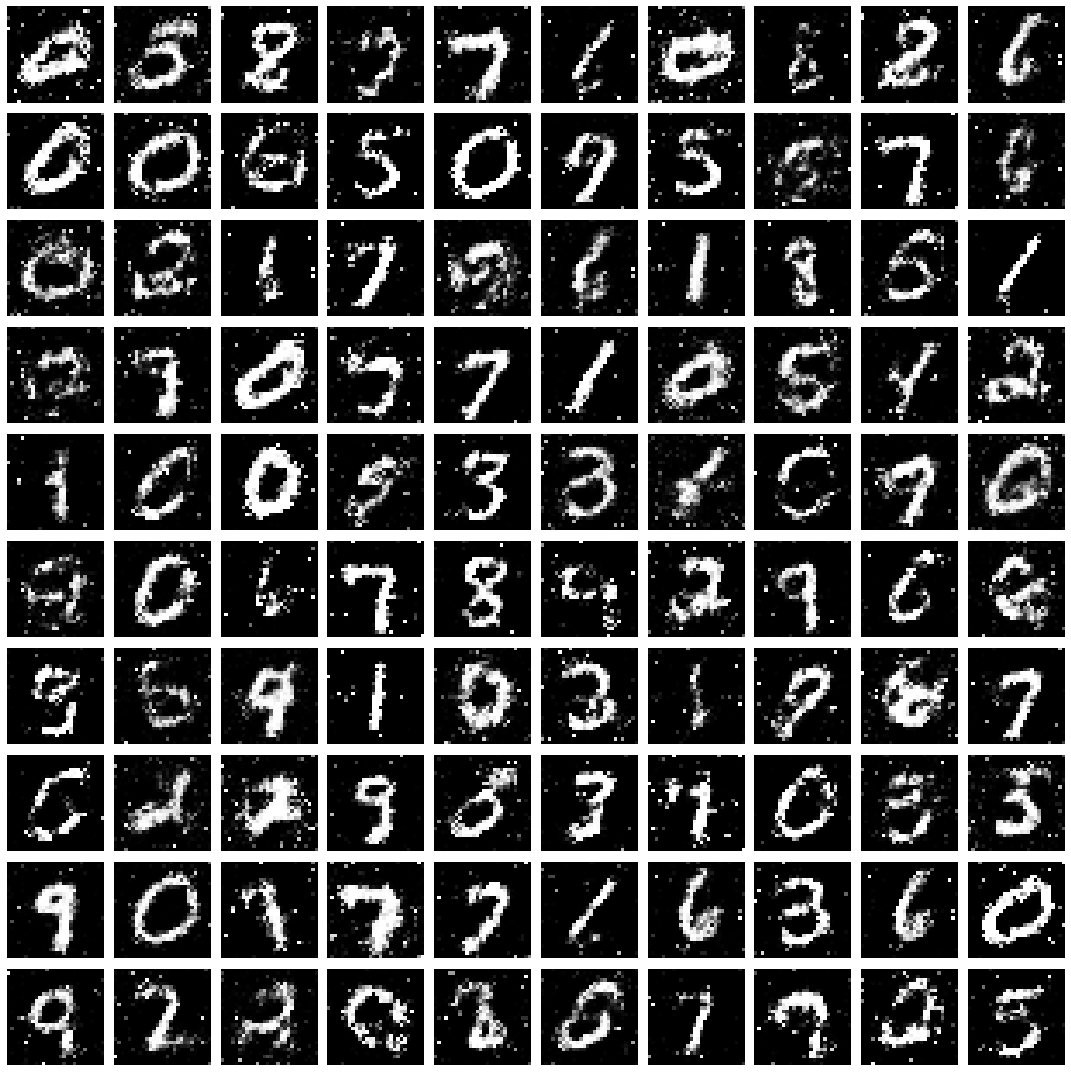

Epoch 21 ! Discriminator Loss = 0.6497 & Generator Loss = 1.0215
Epoch 22 ! Discriminator Loss = 0.6536 & Generator Loss = 1.0091
Epoch 23 ! Discriminator Loss = 0.6539 & Generator Loss = 1.0122
Epoch 24 ! Discriminator Loss = 0.6534 & Generator Loss = 1.0059
Epoch 25 ! Discriminator Loss = 0.6542 & Generator Loss = 1.0095


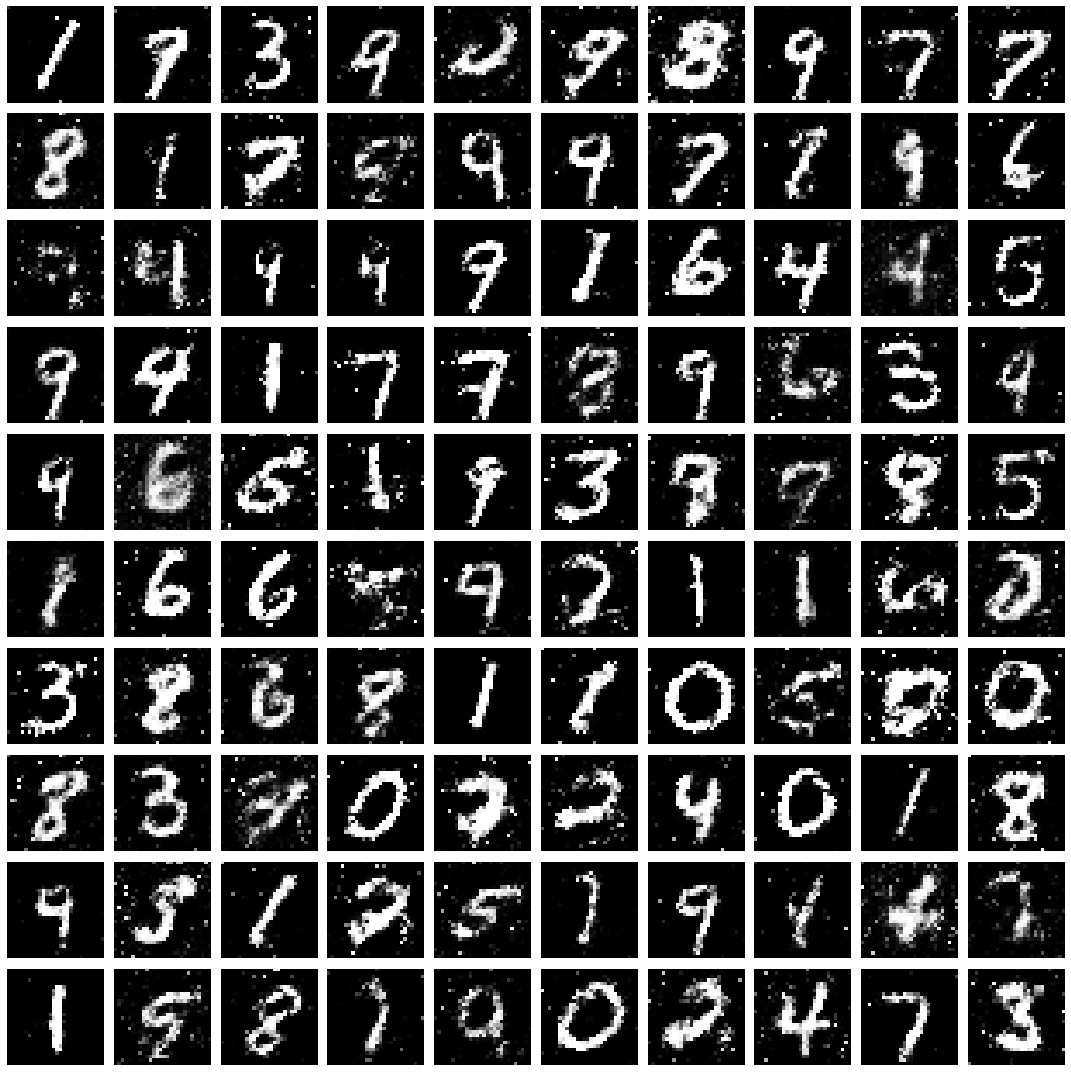

Epoch 26 ! Discriminator Loss = 0.6576 & Generator Loss = 0.9937
Epoch 27 ! Discriminator Loss = 0.6579 & Generator Loss = 0.9997
Epoch 28 ! Discriminator Loss = 0.6611 & Generator Loss = 0.9884
Epoch 29 ! Discriminator Loss = 0.6617 & Generator Loss = 0.9993
Epoch 30 ! Discriminator Loss = 0.6624 & Generator Loss = 0.9888


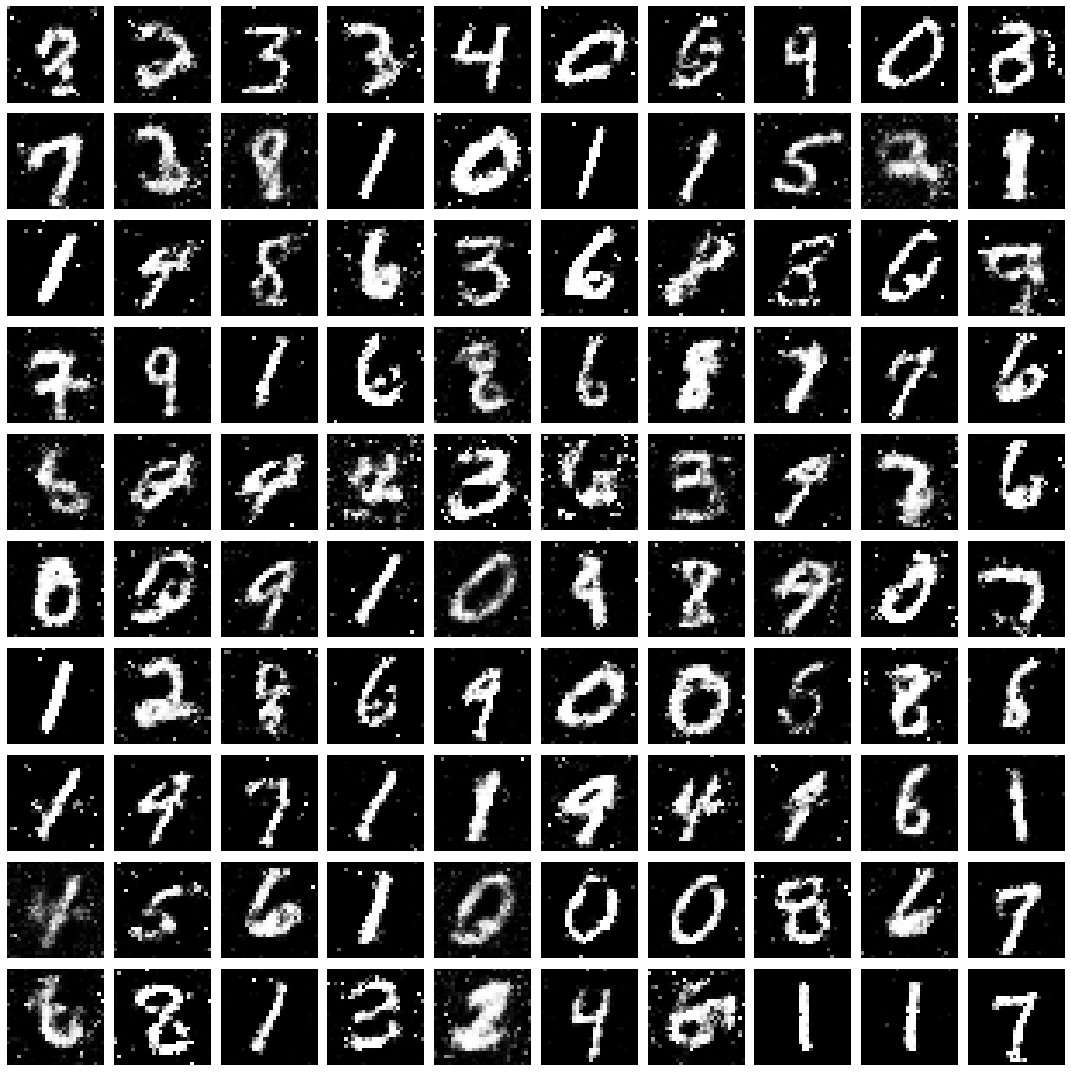

Epoch 31 ! Discriminator Loss = 0.6632 & Generator Loss = 0.9880
Epoch 32 ! Discriminator Loss = 0.6630 & Generator Loss = 0.9897
Epoch 33 ! Discriminator Loss = 0.6641 & Generator Loss = 0.9819
Epoch 34 ! Discriminator Loss = 0.6657 & Generator Loss = 0.9857
Epoch 35 ! Discriminator Loss = 0.6634 & Generator Loss = 0.9878


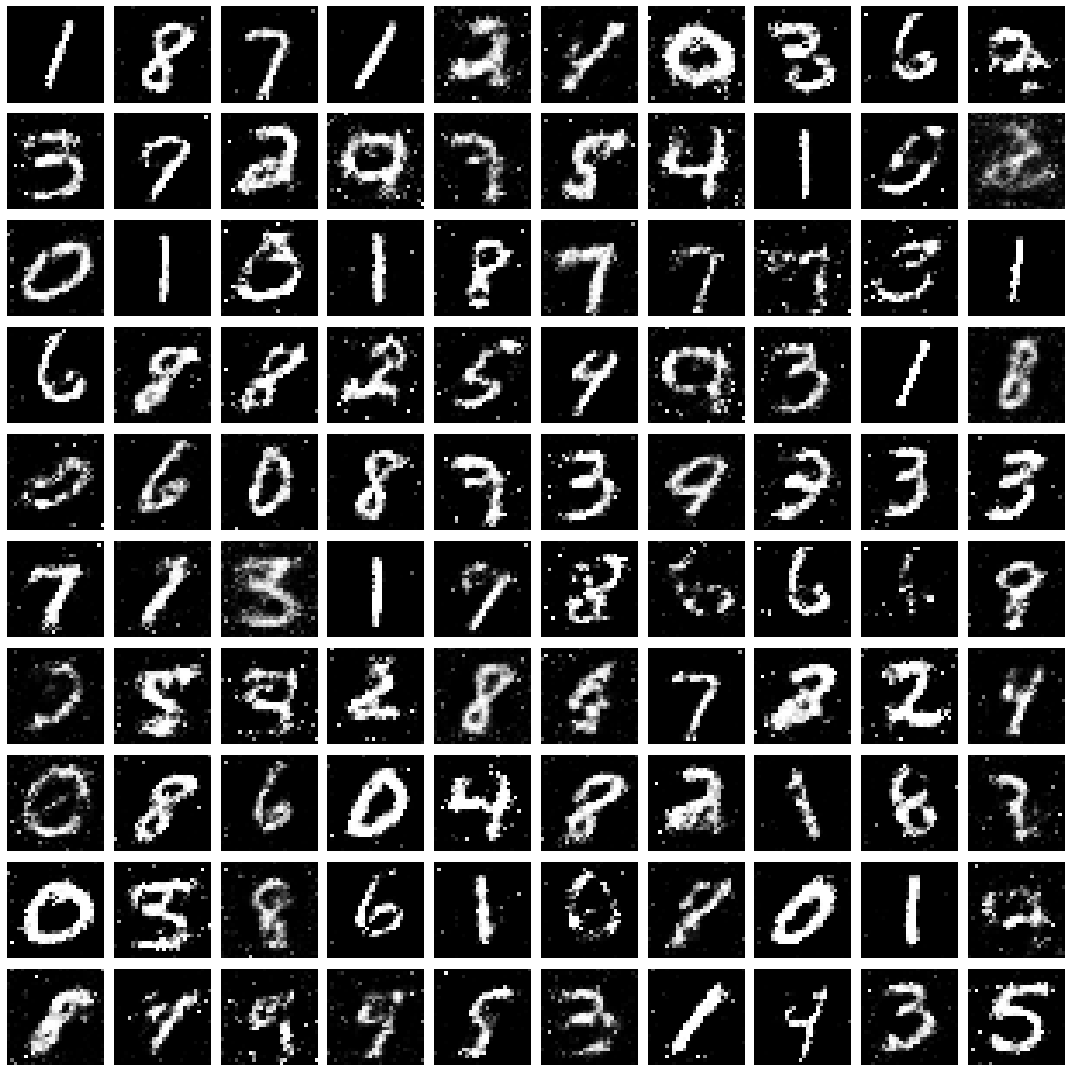

Epoch 36 ! Discriminator Loss = 0.6646 & Generator Loss = 0.9835
Epoch 37 ! Discriminator Loss = 0.6645 & Generator Loss = 0.9893
Epoch 38 ! Discriminator Loss = 0.6630 & Generator Loss = 0.9822
Epoch 39 ! Discriminator Loss = 0.6626 & Generator Loss = 0.9859
Epoch 40 ! Discriminator Loss = 0.6626 & Generator Loss = 0.9914


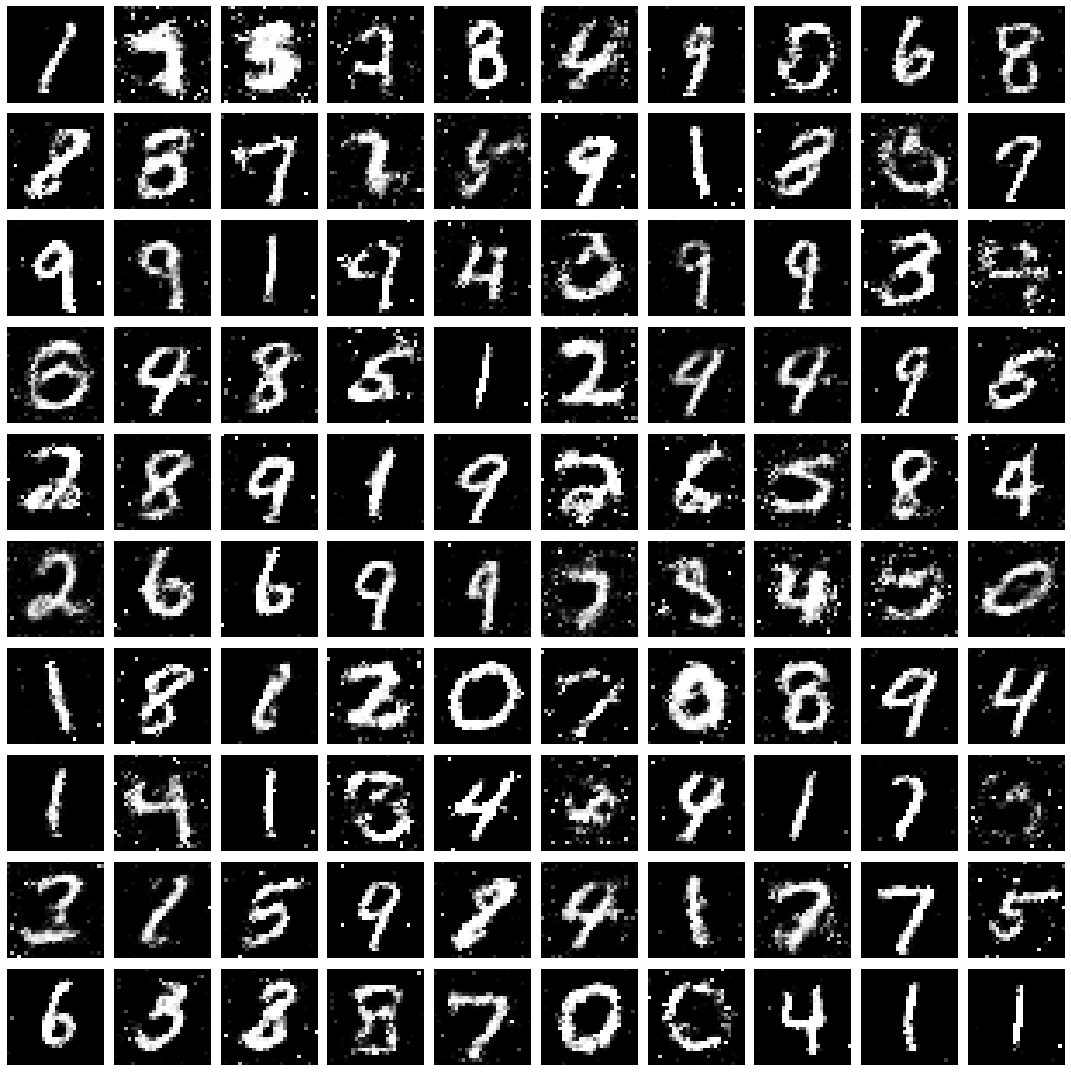

Epoch 41 ! Discriminator Loss = 0.6635 & Generator Loss = 0.9896
Epoch 42 ! Discriminator Loss = 0.6620 & Generator Loss = 0.9892
Epoch 43 ! Discriminator Loss = 0.6635 & Generator Loss = 0.9871
Epoch 44 ! Discriminator Loss = 0.6650 & Generator Loss = 0.9881
Epoch 45 ! Discriminator Loss = 0.6636 & Generator Loss = 0.9888


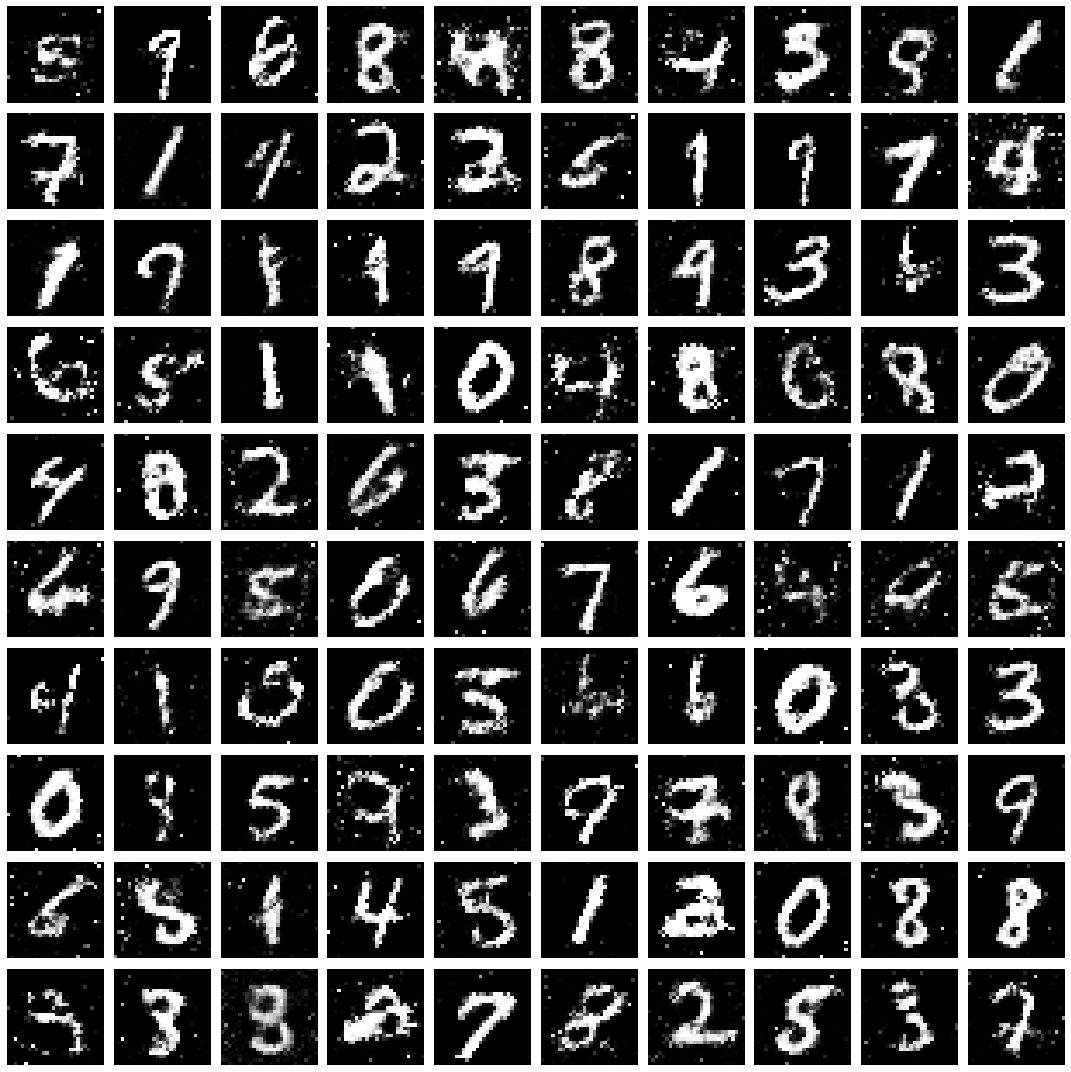

Epoch 46 ! Discriminator Loss = 0.6637 & Generator Loss = 0.9821
Epoch 47 ! Discriminator Loss = 0.6624 & Generator Loss = 0.9884
Epoch 48 ! Discriminator Loss = 0.6641 & Generator Loss = 0.9832
Epoch 49 ! Discriminator Loss = 0.6626 & Generator Loss = 0.9860
Epoch 50 ! Discriminator Loss = 0.6631 & Generator Loss = 0.9848


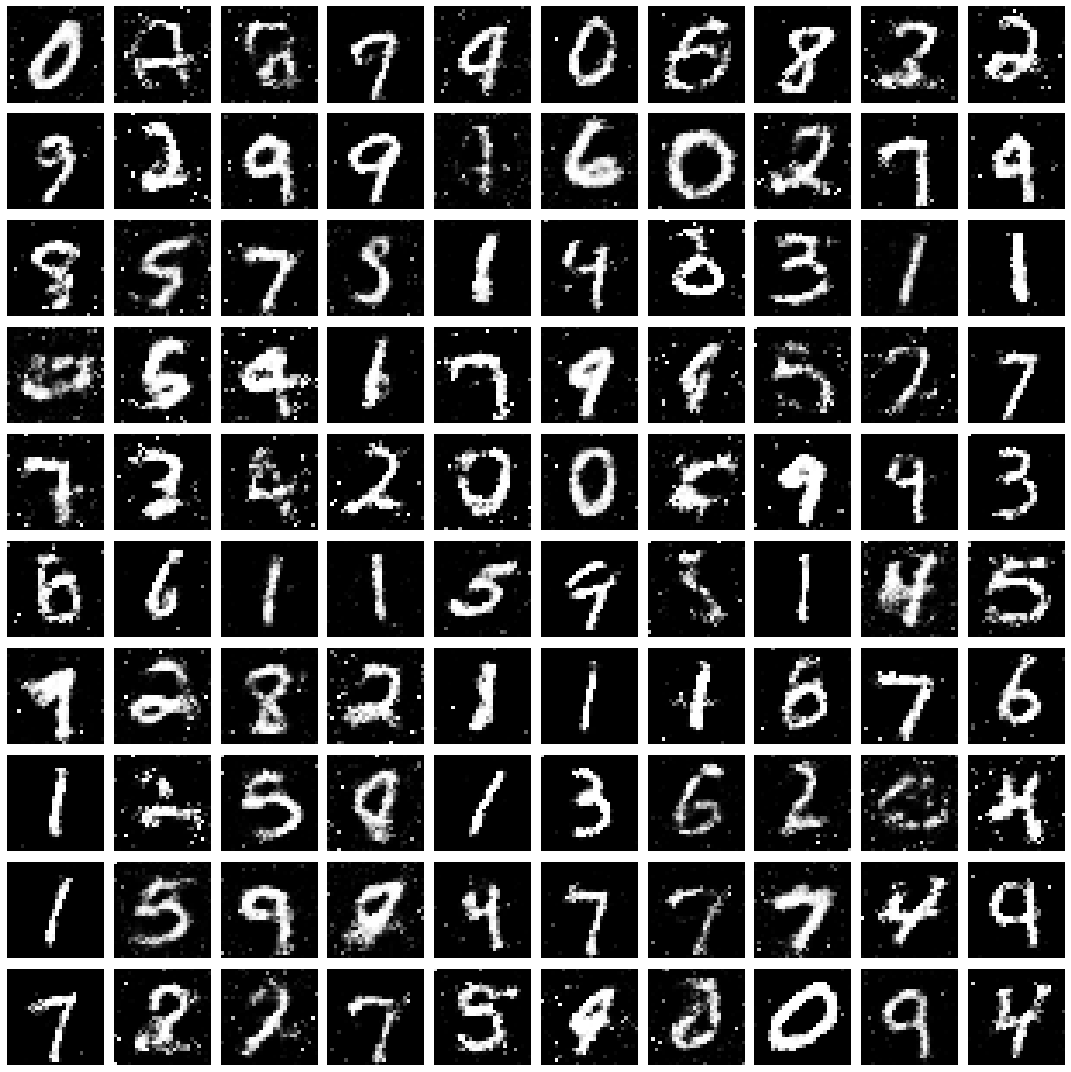

In [11]:
d_losses = []
g_losses = []

for epoch in range(TOTAL_EPOCHS):
    epoch_d_loss = 0.0 
    epoch_g_loss = 0.0
    
    # Mini Batch SGD (Mini Batch Stochastic Gradient Descent)
    for step in range(NO_OF_BATCHES):
        
        # Step-1 Train Discriminator
        # 50% Real Data + 50% Fake Data
        
        # Real Data X
        idx = np.random.randint(0, X_Train.shape[0], HALF_BATCH)
        real_imgs = X_Train[idx]
        
        # Fake Data X
        noise = np.random.normal(0, 1, size=(HALF_BATCH, NOISE_DIM))
        fake_imgs = generator.predict(noise) # Forward Pass
        
        # Labels
        real_y = np.ones((HALF_BATCH,1)) * 0.9 # One Sided Label Smoothing For Discriminator
        fake_y = np.zeros((HALF_BATCH,1))
        
        # Train Our Discriminator
        d_loss_real = discriminator.train_on_batch(real_imgs, real_y)
        d_loss_fake = discriminator.train_on_batch(fake_imgs, fake_y)
        d_loss = (0.5 * d_loss_real) + (0.5 * d_loss_fake)
        
        epoch_d_loss += d_loss
        
        # Step-2 Train Generator (Considering Frozen Discriminator)
        noise = np.random.normal(0, 1, size=(BATCH_SIZE, NOISE_DIM))
        ground_truth_y = np.ones((BATCH_SIZE, 1))
        g_loss = model.train_on_batch(noise, ground_truth_y)
        epoch_g_loss += g_loss
        
    print("Epoch %d ! Discriminator Loss = %.4f & Generator Loss = %.4f"%((epoch+1), (epoch_d_loss/NO_OF_BATCHES), (epoch_g_loss/NO_OF_BATCHES)))
    d_losses.append(epoch_d_loss/NO_OF_BATCHES)
    g_losses.append(epoch_g_loss/NO_OF_BATCHES)
    
    if((epoch+1)%5 == 0):
        generator.save("GAN_Models/gan_generator_{}.h5".format(epoch+1))
        save_imgs(epoch)

### Plotting The Losses

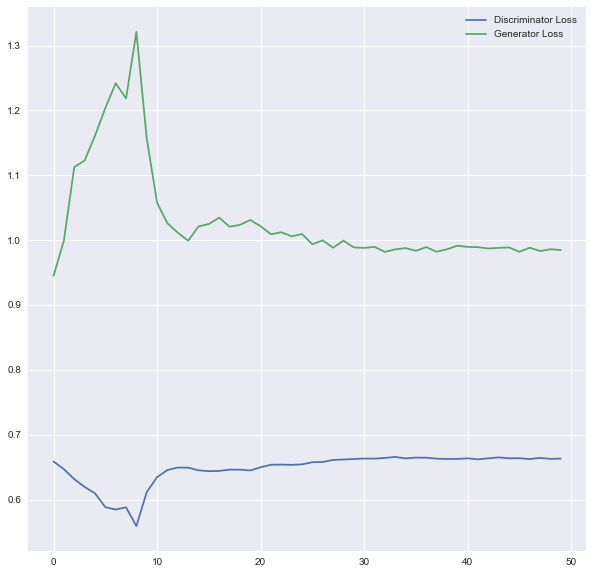

In [12]:
plt.style.use("seaborn")
plt.figure(figsize=(10,10))
plt.plot(d_losses, label="Discriminator Loss")
plt.plot(g_losses, label="Generator Loss")
plt.legend()
plt.show()